Importing Dependencies

```
# This is formatted as code
```



In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #openCV
from google.colab.patches import cv2_imshow #alternative to cv2.cv2_imshow
from PIL import Image #Pillow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST DATA

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


TRAINING DATA ==> 60000 IMAGES,
TEST DATA ==> 10000 IMAGES,

DIMS => 28 x 28,
GRAYSCALE IMAGES => 1 D

In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

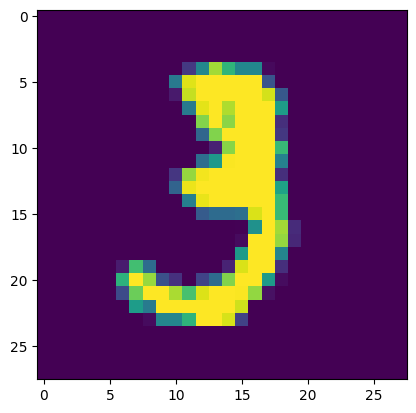

3


In [6]:
#Diplaying a image
plt.imshow(X_train[10])
plt.show()

#printing corresponding label
print(Y_train[10])

In [7]:
print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
#scaling the values ==> since values in range 0 to 255, scaling to range 0 to 1

X_train = X_train/255
X_test = X_test/255

In [9]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
#setting up layers

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
                            ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#compling the model
model.compile( optimizer ='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
# Training the model
history = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8469 - loss: 0.5307
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9532 - loss: 0.1537
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9674 - loss: 0.1081
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9746 - loss: 0.0851
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9790 - loss: 0.0692
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9827 - loss: 0.0580
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0497
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0434
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9889 - loss: 0.0379
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9910 - loss: 0.0322


In [13]:
# Evaluating the model on test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1348
Test accuracy: 0.9684000015258789


In [14]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
print(Y_pred.shape)

(10000, 10)


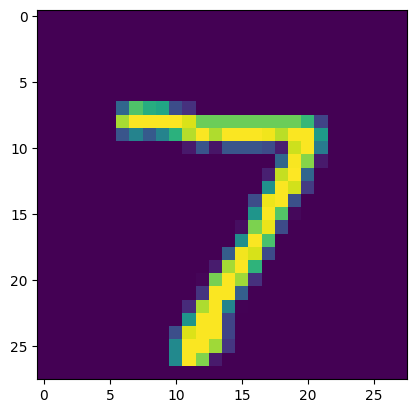

In [16]:
plt.imshow(X_test[0])

In [17]:
print(Y_pred[0])

[2.8758796e-04 6.4372030e-06 1.2316622e-02 2.4197210e-01 3.8828599e-10
 1.3435982e-05 9.8400097e-15 9.9996698e-01 6.2324347e-05 2.5966728e-01]


In [18]:
print(Y_pred)

[[2.8758796e-04 6.4372030e-06 1.2316622e-02 ... 9.9996698e-01
  6.2324347e-05 2.5966728e-01]
 [6.6848569e-02 4.3416927e-03 9.9988401e-01 ... 5.8989947e-08
  2.3318999e-05 1.1044033e-09]
 [2.8162388e-02 9.9994093e-01 9.0592071e-02 ... 9.6737957e-01
  3.5299191e-01 2.5139647e-03]
 ...
 [8.9903436e-09 2.0706259e-06 1.0245019e-04 ... 9.6827734e-01
  6.6457792e-06 2.1370776e-01]
 [2.0373984e-07 1.8981014e-05 1.1758706e-04 ... 9.9959420e-03
  9.8877382e-01 6.7932917e-05]
 [1.7102157e-03 8.1241920e-09 1.4644967e-02 ... 2.0459339e-08
  1.0314891e-01 4.6400626e-07]]


In [19]:
# model.predict() gives probabilities for class of each data points
# converting these probabilities to class labels using np.argmax function which gives index value of highest values

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [20]:
print(Y_pred_labels[0])

7


In [21]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 959    1    1    0    1    1    2    1    1   13]
 [   1 1103    1    6    0    1    6    1   15    1]
 [   6    0  982    9    4    0    5   10   15    1]
 [   0    0    4  985    0    3    0    8    4    6]
 [   1    1    3    0  952    2    4    2    3   14]
 [   2    0    0   12    0  857    8    2    7    4]
 [   4    2    0    1    7    3  936    1    2    2]
 [   2    1    6    4    0    0    0  997    3   15]
 [   4    0    3    7    5    8    3    3  935    6]
 [   1    1    0    3   10    5    0    5    6  978]], shape=(10, 10), dtype=int32)


Text(0.5, 23.52222222222222, 'Predicted labels')

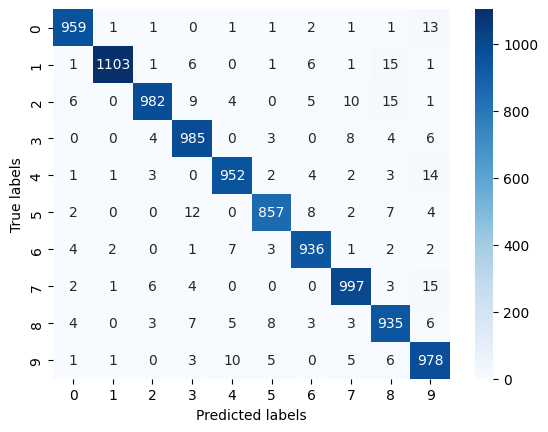

In [22]:
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

Building Predictive System

In [24]:
img_path = "/content/digit.png"

img = cv2.imread(img_path)

In [25]:
type(img)

numpy.ndarray

In [26]:
img.shape

(323, 323, 3)

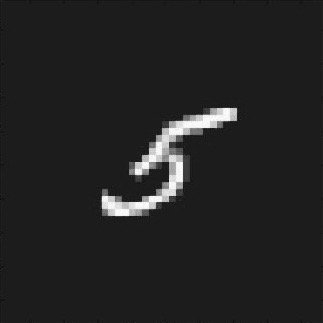

In [29]:
cv2_imshow(img)

In [30]:
grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [31]:
grayscale.shape

(323, 323)

In [32]:
img_resize = cv2.resize(grayscale,(28,28))

In [33]:
img_resize.shape

(28, 28)

In [34]:
cv2_imshow(img_resize)

In [35]:
print(img_resize)

[[ 27  27  28  27  27  29  27  27  26  27  27  25  27  27  28  27  27  27
   27  27  23  27  27  27  27  27  26  27]
 [ 28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28
   28  28  28  28  28  28  28  28  28  28]
 [ 29  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28
   28  28  28  28  28  28  28  28  28  28]
 [ 27  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28
   28  28  28  28  28  28  28  28  28  28]
 [ 26  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28
   28  28  28  28  28  28  28  28  28  28]
 [ 27  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28
   28  28  28  28  28  28  28  28  28  28]
 [ 27  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28
   28  28  28  28  28  28  28  28  28  28]
 [ 27  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28  28
   28  28  28  28  28  28  28  28  28  28]
 [ 25  28  28  28  28  28  28  28  28  28  28  28  28  28  28  2

In [36]:
img_resize = img_resize/255 #to get vaue betwn 0 and 1

In [37]:
print(img_resize)

[[0.10588235 0.10588235 0.10980392 0.10588235 0.10588235 0.11372549
  0.10588235 0.10588235 0.10196078 0.10588235 0.10588235 0.09803922
  0.10588235 0.10588235 0.10980392 0.10588235 0.10588235 0.10588235
  0.10588235 0.10588235 0.09019608 0.10588235 0.10588235 0.10588235
  0.10588235 0.10588235 0.10196078 0.10588235]
 [0.10980392 0.10980392 0.10980392 0.10980392 0.10980392 0.10980392
  0.10980392 0.10980392 0.10980392 0.10980392 0.10980392 0.10980392
  0.10980392 0.10980392 0.10980392 0.10980392 0.10980392 0.10980392
  0.10980392 0.10980392 0.10980392 0.10980392 0.10980392 0.10980392
  0.10980392 0.10980392 0.10980392 0.10980392]
 [0.11372549 0.10980392 0.10980392 0.10980392 0.10980392 0.10980392
  0.10980392 0.10980392 0.10980392 0.10980392 0.10980392 0.10980392
  0.10980392 0.10980392 0.10980392 0.10980392 0.10980392 0.10980392
  0.10980392 0.10980392 0.10980392 0.10980392 0.10980392 0.10980392
  0.10980392 0.10980392 0.10980392 0.10980392]
 [0.10588235 0.10980392 0.10980392 0.109803

In [38]:
img_reshaped = np.reshape(img_resize,[1,28,28])

In [39]:
input_prediction = model.predict(img_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[5.7447284e-01 2.0055098e-02 7.7611995e-01 6.2187010e-01 3.9777852e-04
  5.2934587e-03 2.4944332e-01 5.1393699e-02 7.1043587e-01 6.5189958e-02]]


In [40]:
input_label = np.argmax(input_prediction)
print(input_label)

2


Predictive System

In [41]:
img_path = input("path of the image: ")

img = cv2.imread(img_path)

grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

img_resize = cv2.resize(grayscale,(28,28))

img_resize = img_resize/255 #to get vaue betwn 0 and 1

img_reshaped = np.reshape(img_resize,[1,28,28])

input_prediction = model.predict(img_reshaped)
print(input_prediction)

input_label = np.argmax(input_prediction)
print(input_label)

path of the image: /content/digits.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[6.5956092e-06 8.3797815e-04 7.0439517e-01 9.6887016e-01 3.9936352e-09
  9.9999791e-01 5.5939637e-07 1.7440572e-02 1.9912863e-04 4.1484553e-02]]
5
